In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/57854a33a5a8eebbfbf387a6a7cb20b66bd7a2d0/bigdatamart_Train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.nunique()


Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
#check for null value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#check for catagorical values
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
      cat_col.append(x)
cat_col    

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
Imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')


In [11]:
df['Outlet_Size']=Imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))


In [12]:
Imp=SimpleImputer(missing_values=np.nan,strategy='mean')


In [13]:
df['Item_Weight']=Imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))


In [14]:
df.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
#creation of new attribute
df['New_Item_Type']=df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [19]:
df['New_Item_Type']=df['New_Item_Type'].replace({'FD':'Food','NC':'Non-consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [20]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})


In [21]:
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
df.loc[df['New_Item_Type']=='Non-consumable', 'Item_Fat_Content']= 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [23]:
df['Outlet_Years']=2013 - df['Outlet_Establishment_Year']


In [24]:
df['Outlet_Years']


0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

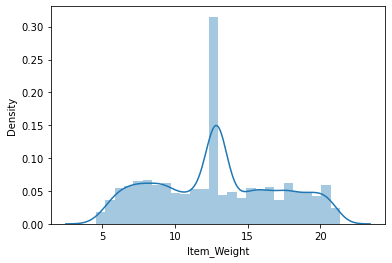

In [25]:
#EDA
sns.distplot(df['Item_Weight'])
plt.show()

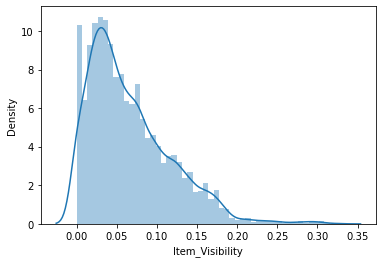

In [26]:
sns.distplot(df['Item_Visibility'])
plt.show()

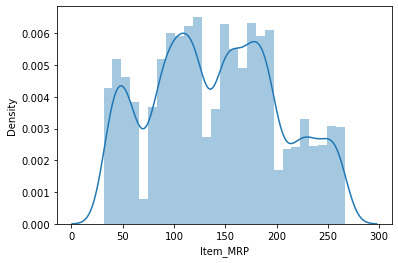

In [27]:
sns.distplot(df['Item_MRP'])
plt.show()

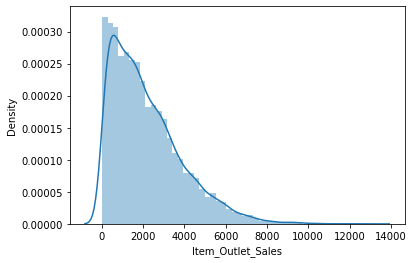

In [28]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

In [29]:
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])


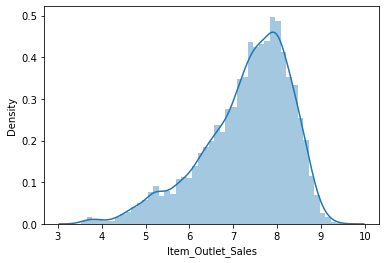

In [30]:

sns.distplot(df['Item_Outlet_Sales'])
plt.show()

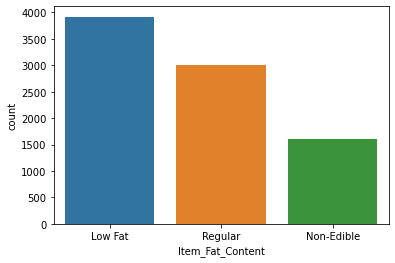

In [31]:
sns.countplot(df['Item_Fat_Content'])
plt.show()


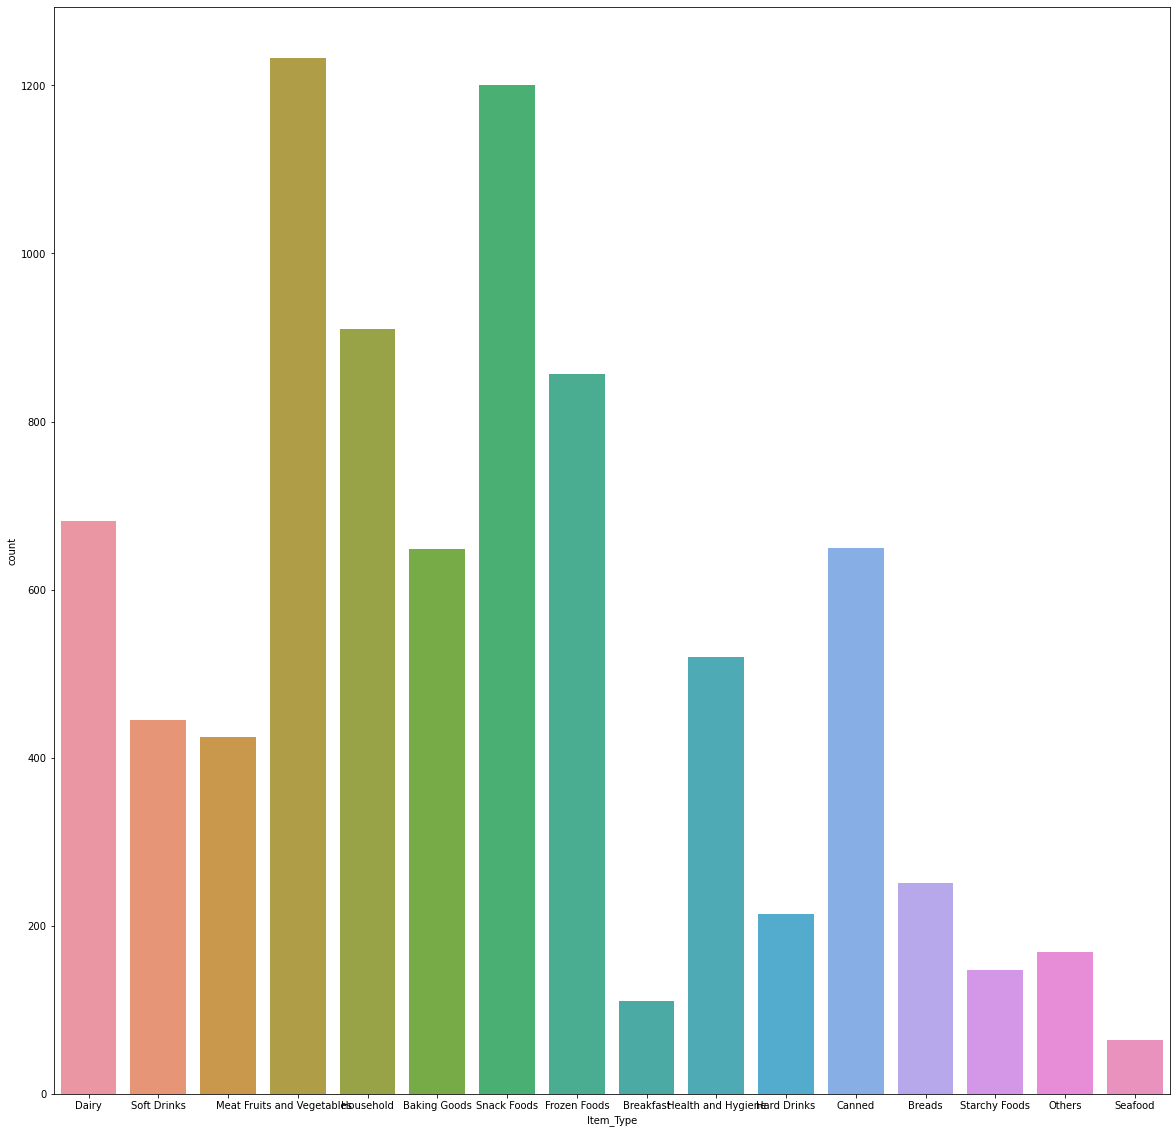

In [35]:
figure=plt.figure(figsize=(20,20))
sns.countplot(df['Item_Type'])
plt.show()

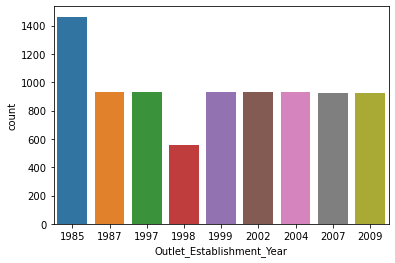

In [36]:
sns.countplot(df['Outlet_Establishment_Year'])
plt.show()

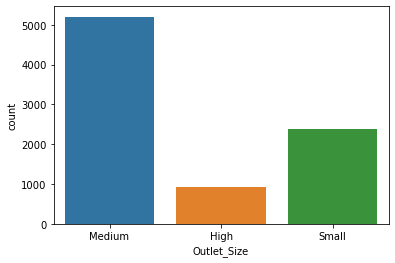

In [37]:
sns.countplot(df['Outlet_Size'])
plt.show()

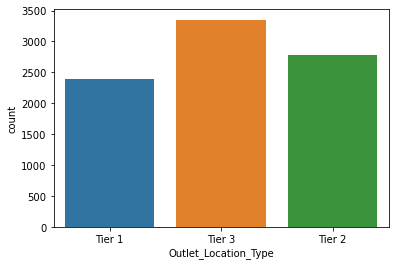

In [38]:
sns.countplot(df['Outlet_Location_Type'])
plt.show()

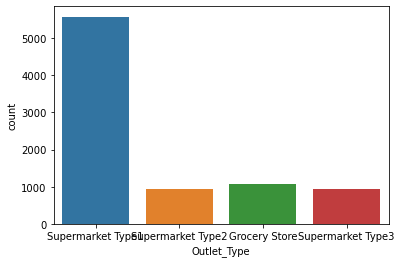

In [40]:
sns.countplot(df['Outlet_Type'])
plt.show()

In [41]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales           -0.882266
Outlet_Years                 0.396641
dtype: float64

In [42]:
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

In [43]:
features=['Item_MRP','Item_Weight','Item_Visibility','Item_Outlet_Sales','Outlet_Years']


In [44]:
pt=PowerTransformer(method='yeo-johnson')
df[features]=pt.fit_transform(df[features].values)

In [45]:
df.skew()

Item_Weight                 -0.068024
Item_Visibility              0.124279
Item_MRP                    -0.115386
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales           -0.120134
Outlet_Years                -0.062702
dtype: float64

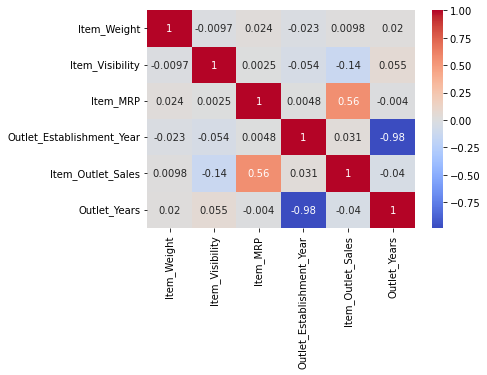

In [47]:
# find the correletion
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [48]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,-0.822636,Low Fat,-1.146886,Dairy,1.623670,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.989182,Food,0.051410
1,DRC01,-1.733801,Regular,-1.037100,Soft Drinks,-1.595016,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.233472,Drinks,-1.648851
2,FDN15,1.086362,Low Fat,-1.122375,Meat,0.081237,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.234576,Food,0.051410
3,FDX07,1.447728,Regular,-1.745551,Fruits and Vegetables,0.689968,OUT010,1998,Medium,Tier 3,Grocery Store,-0.840036,Food,0.169443
4,NCD19,-0.917588,Non-Edible,-1.745551,Household,-1.476078,OUT013,1987,High,Tier 3,Supermarket Type1,-0.564143,Non-consumable,1.213943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,-1.468096,Low Fat,0.020310,Snack Foods,1.148258,OUT013,1987,High,Tier 3,Supermarket Type1,0.586437,Food,1.213943
8519,FDS36,-1.060659,Regular,-0.221388,Baking Goods,-0.463127,OUT045,2002,Medium,Tier 2,Supermarket Type1,-1.074158,Food,-0.339824
8520,NCJ29,-0.496556,Non-Edible,-0.542979,Health and Hygiene,-0.867930,OUT035,2004,Small,Tier 2,Supermarket Type1,-0.386470,Non-consumable,-0.640938
8521,FDN46,-1.373443,Regular,1.459990,Snack Foods,-0.548996,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.084179,Food,-1.648851


## Label Encoding


In [49]:
from sklearn.preprocessing import LabelEncoder


In [50]:
le=LabelEncoder()
cat_col=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','New_Item_Type','Outlet_Type']
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [51]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,156,-0.822636,0,-1.146886,4,1.623670,OUT049,1999,1,0,1,0.989182,1,0.051410
1,8,-1.733801,2,-1.037100,14,-1.595016,OUT018,2009,1,2,2,-1.233472,0,-1.648851
2,662,1.086362,0,-1.122375,10,0.081237,OUT049,1999,1,0,1,0.234576,1,0.051410
3,1121,1.447728,2,-1.745551,6,0.689968,OUT010,1998,1,2,0,-0.840036,1,0.169443
4,1297,-0.917588,1,-1.745551,9,-1.476078,OUT013,1987,0,2,1,-0.564143,2,1.213943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,-1.468096,0,0.020310,13,1.148258,OUT013,1987,0,2,1,0.586437,1,1.213943
8519,897,-1.060659,2,-0.221388,0,-0.463127,OUT045,2002,1,1,1,-1.074158,1,-0.339824
8520,1357,-0.496556,1,-0.542979,8,-0.867930,OUT035,2004,2,1,1,-0.386470,2,-0.640938
8521,681,-1.373443,2,1.459990,13,-0.548996,OUT018,2009,1,2,2,0.084179,1,-1.648851


In [52]:
df=df.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1)


## To remove out the outlier


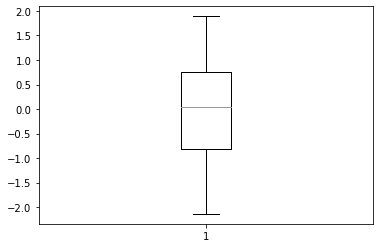

In [53]:
plt.boxplot(df['Item_Weight'])
plt.show()

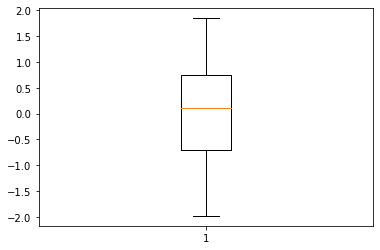

In [54]:
plt.boxplot(df['Item_MRP'])
plt.show()

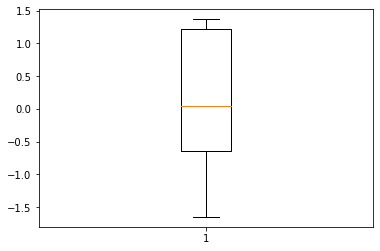

In [55]:
plt.boxplot(df['Outlet_Years'])
plt.show()

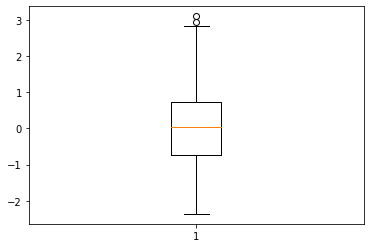

In [56]:
plt.boxplot(df['Item_Outlet_Sales'])
plt.show()

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [58]:
threashold=3
print(np.where(z>3))

(array([7188], dtype=int64), array([8], dtype=int64))


In [59]:
df_new=df[(z<3).all(axis=1)]

In [60]:
df.shape,df_new.shape

((8523, 11), (8522, 11))

In [61]:
df_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,-0.822636,0,-1.146886,4,1.623670,1,0,1,0.989182,1,0.051410
1,-1.733801,2,-1.037100,14,-1.595016,1,2,2,-1.233472,0,-1.648851
2,1.086362,0,-1.122375,10,0.081237,1,0,1,0.234576,1,0.051410
3,1.447728,2,-1.745551,6,0.689968,1,2,0,-0.840036,1,0.169443
4,-0.917588,1,-1.745551,9,-1.476078,0,2,1,-0.564143,2,1.213943
...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.468096,0,0.020310,13,1.148258,0,2,1,0.586437,1,1.213943
8519,-1.060659,2,-0.221388,0,-0.463127,1,1,1,-1.074158,1,-0.339824
8520,-0.496556,1,-0.542979,8,-0.867930,2,1,1,-0.386470,2,-0.640938
8521,-1.373443,2,1.459990,13,-0.548996,1,2,2,0.084179,1,-1.648851


In [62]:
x=df_new.drop('Item_Outlet_Sales',axis=1)
y=df_new['Item_Outlet_Sales']

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [65]:
x_train.shape,x_test.shape

((6817, 10), (1705, 10))

## Linear Regression Algorithm


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [67]:
lr=LinearRegression()

In [68]:
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
pred=lr.predict(x_test)

In [70]:
lr.intercept_

-0.035109161331855786

In [71]:
lr.coef_

array([-0.01081515,  0.01372203, -0.0531642 ,  0.00113334,  0.56314743,
       -0.33970598, -0.3969218 ,  0.71086562, -0.00352524, -0.08737283])

In [72]:
print('mean-squared-error',mean_squared_error(y_test,pred))

mean-squared-error 0.40693370585799815


In [73]:
print('mean-absolute-error',mean_absolute_error(y_test,pred))

mean-absolute-error 0.5116002086948146


In [74]:
print('r2-score',r2_score(y_test,pred))

r2-score 0.5786079656353187


In [75]:
score=cross_val_score(lr,x,y,cv=5)

In [76]:
print(score)
print(score.mean())
print(score.std())

[0.59422239 0.58257553 0.56157739 0.56937441 0.58497287]
0.5785445158386027
0.01162189954263519


## Ridge-Lasso

In [77]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet


In [78]:
rd=Ridge(alpha=.1)


In [79]:
rd.fit(x_train,y_train)


Ridge(alpha=0.1)

In [80]:
pred=rd.predict(x_test)


In [81]:
rd.intercept_


-0.03516854291204249

In [82]:
rd.coef_


array([-0.01081475,  0.01372181, -0.05316793,  0.0011334 ,  0.56313881,
       -0.33966349, -0.39687973,  0.71083474, -0.00352547, -0.08736675])

In [83]:
print('mean-Squared_error',mean_squared_error(y_test,pred))


mean-Squared_error 0.40693334004188986


In [84]:
print('mean_absolute_error',mean_absolute_error(y_test,pred))


mean_absolute_error 0.5116005164707219


In [85]:
print('r2 score',r2_score(y_test,pred))


r2 score 0.5786083444488498


In [86]:
score=cross_val_score(rd,x,y,cv=5)


In [87]:

print(score)
print(score.mean())
print(score.std())

[0.5942204  0.58257681 0.5615796  0.56937467 0.58497171]
0.5785446380941436
0.011620638028584217


In [88]:
ls=Lasso(alpha=.1)

In [89]:
ls.fit(x_train,y_train)


Lasso(alpha=0.1)

In [90]:
ls.coef_


array([-0.        ,  0.        , -0.        ,  0.        ,  0.46024549,
       -0.        , -0.        ,  0.4216788 ,  0.        , -0.        ])

In [91]:
ls.intercept_


-0.5099660022835129

In [92]:
pred=ls.predict(x_test)


In [93]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolue error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(y_test,pred))

mean squared error 0.48113884900756715
mean absolue error 0.5600982952059429
r2 score 0.5017663185021835


In [94]:
score=cross_val_score(ls,x,y,cv=5)


In [95]:
print(score)
print(score.mean())
print(score.std())

[0.49925792 0.49620069 0.49087121 0.49190423 0.49441054]
0.49452891765466356
0.0030146336959557007


In [96]:
en=ElasticNet(alpha=.1)

In [97]:
en.fit(x_train,y_train)


ElasticNet(alpha=0.1)

In [98]:
en.coef_


array([-0.        ,  0.        , -0.03668484,  0.        ,  0.48629247,
       -0.        , -0.05840143,  0.48395021,  0.        , -0.00199946])

In [99]:
en.intercept_


-0.5199127578201528

In [100]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(y_test,pred))

mean squared error 0.48113884900756715
mean absolute error 0.5600982952059429
r2 score 0.5017663185021835


In [101]:
srcoe=cross_val_score(en,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.49925792 0.49620069 0.49087121 0.49190423 0.49441054]
0.49452891765466356
0.0030146336959557007


## Support vector machine

In [102]:
from sklearn.svm import SVR


In [103]:
svr=SVR()


In [104]:
svr.fit(x_train,y_train)


SVR()

In [105]:
pred=svr.predict(x_test)


In [106]:
print('mean square error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(y_test,pred))

mean square error 0.2917654426800358
mean absolute error 0.4249343778392095
r2 score 0.6978681498279344


In [107]:
score=cross_val_score(svr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.69435446 0.68356425 0.67234279 0.68411117 0.70484451]
0.6878434365792692
0.010990368848959457


## Decision Tree Regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor


In [109]:
dtr=DecisionTreeRegressor()


In [110]:
dtr.fit(x_train,y_train)


DecisionTreeRegressor()

In [111]:
pred=dtr.predict(x_test)


In [112]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(y_test,pred))

mean_squared_error 0.6277255213082614
mean_absolute_error 0.6079767800070794
r2 score 0.3499714311229266


In [113]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.40681159 0.3592195  0.37738575 0.34398663 0.40270504]
0.37802170199121415
0.024291720690620234


## Random Forest Regressor


In [114]:
from sklearn.ensemble import RandomForestRegressor


In [115]:
rf=RandomForestRegressor()


In [116]:
rf.fit(x_train,y_train)


RandomForestRegressor()

In [117]:
pred=rf.predict(x_test)


In [118]:
print('mean_squred_error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(y_test,pred))

mean_squred_error 0.3217499631557251
mean absolute error 0.44575868537098995
r2 score 0.6668182812601307


In [119]:
score=cross_val_score(rf,x,y,cv=10)

In [120]:
print(score)
print(score.mean())
print(score.std())

[0.65508795 0.6742558  0.619706   0.68579069 0.62086107 0.67979587
 0.67402115 0.65008672 0.70343677 0.65191908]
0.6614961091374855
0.025815481421128054


## AdaBoostRegressor

In [121]:
from sklearn.ensemble import AdaBoostRegressor


In [122]:
ab=AdaBoostRegressor()


In [123]:
ab.fit(x_train,y_train)


AdaBoostRegressor()

In [124]:
pred=ab.predict(x_test)


In [125]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(y_test,pred))

mean_squared_error 0.31783654367247627
mean_absolute_error 0.4467965684058001
r2 score 0.6708707442869807


In [126]:
score=cross_val_score(ab,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.64191548 0.65496155 0.64037782 0.67309372 0.63936726 0.67178411
 0.67804426 0.65197483 0.69398286 0.65211554]
0.659761743310039
0.017549691429795657


In [127]:
from sklearn.model_selection import GridSearchCV


In [128]:
model=RandomForestRegressor()


In [129]:
param={'criterion':['mse', 'mae'],'n_estimators':[10,20,30,40,50],'min_samples_split':[1,2,3,4,5]}


In [130]:
grid=GridSearchCV(estimator=model,param_grid=param,cv=5)


In [131]:
grid.fit(x_train,y_train)  


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [132]:
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]})
0.6653470823915673
mae
{'criterion': 'mae', 'min_samples_split': 5, 'n_estimators': 50}


In [133]:
import joblib

In [134]:
joblib.dump(RandomForestRegressor,'Big_mart_sales_data.obj')

['Big_mart_sales_data.obj']